In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Import & Exploration

### Data & Methodology

The Philippine statistics authority provided a dataset containing the responses on the Family Income and Expenditure Survey (FIES). It provides data on how members of the household spend their income for the wellbeing of the family. It also discusses on the living state and the spending patterns of families with different income groups.

The survey is conducted in two separate rounds on the year 2023 using separate questionnaires with the same set of questions. Each round, the reference period was the half-year period preceding the survey. It’s geographic coverage considers the country’s 17 administrative regions as defined in Executive Orders 36 and 131 as the sampling domains. The data is collected up to a provincial level. Some parts in the country can also further explore to municipal or barangay level.

The dataset contains three volumes that contains

| Volume   | Focus                                | Description                                                                                                                                   |
| -------- | ------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------- |
| Volume 1 | National Summary                     | Contains statistical tables at national and regional levels (urban-rural) and some comparative data from previous FIES.                       |
| Volume 2 | Provincial and Key City/Municipality | Presents data at the national, regional, provincial, and key city/ municipality levels (Years 2000 and earlier).                              |
| Volume 3 | Special Report on Housing            | Presents highlights of the survey results on housing with textual and statistical tables that compare latest data with previous FIES results. |

The data is collected through a survey that is conducted by an interviewer that delivers a survey of 89 pages to a household and collects them in a given time. 

The questionnaire contains seven parts:

| **Part Number** | **Focus**                                      | **Contents**                                                                                                                                     | **Data Type (Numerical, Categorical, Mixed)** |
|-----------------|------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------|
| **Part 1**      | **Identification**                             | - Respondent’s personal information <br> - Interview status <br> - Geographic Identification <br> - Certification                                    | Categorical                                   |
|      | **Particulars About the Family**               | - Head of the Family <br> - Family type <br> - Number of members <br> - Overseas family members <br> - Number of working members in the family    | Categorical                                   |
| **Part 2**      | **Expenditures and other Disbursements**       | - Food <br> - Alcoholic Beverages and Tobacco <br> - Clothing and Footwear <br> - Housing, Water, Electricity, Gas and Other Fuels <br> - Furnishing and Routine Household Maintenance <br> - Health <br> - Transport <br> - Information and Communication <br> - Recreation, Sport and Culture <br> - Education <br> - Restaurant and Accommodation Services <br> - Insurance and Financial Services <br> - Personal Care, Social Protection and Miscellaneous Goods and Services <br> - Durable Furniture and Equipment <br> - Special Family Occasions <br> - Other Expenditures <br> - Other Disbursements | Numerical                                   |
| **Part 3**      | **Housing Characteristics**                   | - Property payment status <br> - Building type <br> - Construction details <br> - Number of floors <br> - Date of construction <br> - Plumbing and Electrical status <br> - Family Conveniences <br> - ICT Devices <br> - Vehicles | Categorical                                   |
| **Part 4**      | **Income and other Receipts**                  | - Salaries and Wages from Employment <br> - Salaries and Wages from Seasonal/Occasional Employment <br> - Net Share of Crops, Fruits, and Vegetables Produced, Aquaculture Products Harvested, or Livestock and Poultry raised by other Households | Numerical                                   |
|                 | **Other Sources of Income**                    | - Cash Receipts, Gifts, Support, Relief, and Other forms of Assistance from Abroad <br> - Cash Receipts, Gifts, Support, Relief, and Other forms of Assistance Domestic Source <br> - Rentals Received from Non-Agricultural Land, Buildings, Spaces, and Other Properties <br> - Interest <br> - Pension and Retirement, Employee Compensation, and Social Security Benefits <br> - Dividends from Investment <br> - Other sources of Income not Elsewhere Classified <br> - Other Receipts <br> - Checklist for Family Sustenance and Entrepreneurial Activities <br> - Family Sustenance Activities | Numerical                                   |
| **Part 5**      | **Entrepreneurial Activities**                 | - Crop Farming and Gardening <br> - Livestock and Poultry Raising <br> - Fishing and Aquaculture <br> - Forestry and Hunting <br> - Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles <br> - Manufacturing <br> - Transportation and Storage <br> - Other Entrepreneurial Activities | Numerical                                   |
| **Part 6**      | **Social Protection**                          | - Questions on Social Pension Program <br> - Questions on Pantawid Pamilyang Pilipino Program (4Ps)                                                 | Categorical                                   |
| **Part 7**      | **Evaluation of the Household Respondent by the Interviewer** | - Respondent’s assessment <br> - Number of respondents <br> - Number of callbacks                                                                | Numerical                                   |


In [2]:
#Load datasets
v1 = pd.read_csv('V1.csv', encoding='latin1')
# v2 = pd.read_csv('V2.csv', encoding='latin1')

In [3]:
v1.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,...,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,...,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,...,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,...,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,...,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,...,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,...,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,...,88.543663,183.513779,2,116587.500000,8,8,6,6,8,1
8,1,28,9,2800,2.5,0,0,0,0,114000,...,88.543663,229.392223,2,116312.000000,8,8,6,6,8,1
9,1,28,10,2800,1.0,0,0,0,0,360000,...,88.543663,91.756889,2,398000.000000,10,10,10,10,10,1


In [4]:
df = v1

In [5]:
df.shape

(163268, 90)

In [6]:
df.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [7]:
df.dtypes

W_REGN          int64
W_PROV          int64
SEQ_NO          int64
RPROV           int64
FSIZE         float64
               ...   
RPCINC          int64
PRPCINC         int64
PPCINC          int64
RPCINC_NIR      int64
W_REGN_NIR      int64
Length: 90, dtype: object

In [8]:
df.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,...,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.600209,45.721427,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,...,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,5.143726,24.820490,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,...,163.523039,783.888869,0.499407,1.585432e+05,2.900291,2.889129,2.873970,2.873305,2.891100,4.957659
min,1.000000,1.000000,1.000000,100.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.019379,0.915853,1.000000,5.240000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,24.000000,40817.750000,2402.000000,3.000000,0.000000e+00,0.000000e+00,2.808000e+04,0.000000e+00,0.000000e+00,...,70.603244,231.964388,1.000000,4.226207e+04,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000
50%,10.000000,46.000000,81634.500000,4600.000000,4.000000,7.200000e+04,0.000000e+00,1.170000e+05,0.000000e+00,0.000000e+00,...,114.635185,444.956711,2.000000,6.552517e+04,5.000000,5.000000,6.000000,5.000000,5.000000,10.000000
75%,13.000000,70.000000,122451.250000,7000.000000,5.000000,2.022000e+05,4.257250e+04,2.330100e+05,0.000000e+00,2.000000e+03,...,192.454697,817.498617,2.000000,1.094002e+05,8.000000,8.000000,8.000000,8.000000,8.000000,14.000000
max,19.000000,99.000000,163268.000000,9900.000000,23.500000,1.547640e+07,1.700000e+07,3.247640e+07,1.200000e+06,4.500000e+06,...,3539.150635,16137.332520,2.000000,4.123060e+07,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

## 2. Identifying Data and Attributes

In [10]:
column_names = df.columns
data_types = df.dtypes

# Column descriptions mapping
description_mapping = {
    "W_REGN": "Region",
    "W_PROV": "Province",
    "SEQ_NO": "Household ID",
    "RPROV": "Province Recode (Province with Highly Urbanized City (HUC) code)",
    "FSIZE": "Average Family Size",
    "REG_SAL": "Salaries/Wages from Regular Employment",
    "SEASON_SAL": "Salaries/Wages from Seasonal Employment",
    "WAGES": "Salaries/Wages",
    "NETSHARE": "Net Share of Crops, Fruits, etc. (Total Net Value of Share)",
    "CASH_ABROAD": "Cash Receipts, Support, etc. from Abroad",
    "CASH_DOMESTIC": "Cash Receipts, Support, etc. from Domestic Source",
    "RENTALS_REC": "Rentals Received from Non-Agricultural Lands, etc.",
    "INTEREST": "Interest Income",
    "PENSION": "Pension and Retirement Benefits",
    "DIVIDENDS": "Dividends from Investment",
    "OTHER_SOURCE": "Other Sources of Income Not Elsewhere Classified (NEC)",
    "NET_RECEIPT": "Family Sustenance Activities",
    "REGFT": "Total Received as Gifts",
    "NET_CFG": "Crop Farming and Gardening Income",
    "NET_LPR": "Livestock and Poultry Raising Income",
    "NET_FISH": "Fishing Income",
    "NET_FOR": "Forestry and Hunting Income",
    "NET_RET": "Wholesale and Retail Income",
    "NET_MFG": "Manufacturing Income",
    "NET_TRANS": "Transportation, Storage Services Income",
    "NET_NEC_A8": "Entrepreneurial Activities Not Elsewhere Classified (NEC)",
    "NET_NEC_A9": "Entrepreneurial Activities NEC",
    "NET_NEC_A10": "Entrepreneurial Activities NEC",
    "EAINC": "Total Income from Entrepreneurial Activities",
    "LOSSES": "Losses from Entrepreneurial Activities",
    "BREAD": "Bread and Cereals Expenditure",
    "MEAT": "Meat Expenditure",
    "FISH": "Fish and Seafood Expenditure",
    "MILK": "Milk, Cheese, and Eggs Expenditure",
    "OIL": "Oils and Fats Expenditure",
    "FRUIT": "Fruit Expenditure",
    "VEG": "Vegetables Expenditure",
    "SUGAR": "Sugar, Jam, Honey, Chocolate, and Confectionery Expenditure",
    "FOOD_NEC": "Food Products Not Elsewhere Classified",
    "FRUIT_VEG": "Fruit and Vegetable Juices Expenditure",
    "COFFEE": "Coffee Expenditure",
    "TEA": "Tea Expenditure",
    "COCOA": "Cocoa Drinks Expenditure",
    "WATER": "Mineral Water Expenditure",
    "SOFTDRINKS": "Soft Drinks Expenditure",
    "OTHER_NON_ALCOHOL": "Other Non-Alcoholic Beverages Expenditure",
    "ALCOHOL": "Alcoholic Beverages Expenditure",
    "TOBACCO": "Tobacco Expenditure",
    "OTHER_VEG": "Other Vegetable-Based Products Expenditure",
    "SERVICES_PRIMARY_GOODS": "Services Related to Primary Goods",
    "ALCOHOL_PROCDUCTION_SERVICES": "Alcohol Production Services",
    "FOOD_HOME": "Total Food Consumed at Home",
    "FOOD_OUTSIDE": "Total Food Expenditures Outside the Home",
    "FOOD": "Total Food Expenditure",
    "CLOTH": "Clothing and Footwear Expenditure",
    "HOUSING_WATER": "Housing, Water, Electricity, Gas, and Other Fuels Expenditure",
    "ACTRENT": "Actual House Rent Paid",
    "IMPUTED_RENT": "Imputed House Rental Value",
    "BIMPUTED_RENT": "Imputed Housing Benefit Rental Value",
    "RENTVAL": "House Rent/Rental Value",
    "FURNISHING": "Furnishings and Routine Household Maintenance",
    "HEALTH": "Health Expenditure",
    "TRANSPORT": "Transport Expenditure",
    "COMMUNICATION": "Communication Expenditure",
    "RECREATION": "Recreation and Culture Expenditure",
    "EDUCATION": "Education Expenditure",
    "INSURANCE": "Insurance Expenditure",
    "MISCELLANEOUS": "Miscellaneous Goods and Services Expenditure",
    "DURABLE": "Durable Furniture and Equipment Expenditure",
    "OCCASION": "Special Family Occasion Expenditure",
    "OTHER_EXPENDITURE": "Other Expenditures (including Value Consumed and Losses)",
    "OTHER_DISBURSEMENT": "Other Disbursement",
    "FOOD_ACCOM_SRVC": "Food Consumed Outside Home - Accommodation Services",
    "NFOOD": "Total Non-Food Expenditure",
    "TOINC": "Total Income",
    "TOTEX": "Total Expenditure",
    "TOTDIS": "Total Disbursements",
    "OTHREC": "Total Other Receipts",
    "TOREC": "Total Receipts",
    "RPSU": "PSU (Recode)",
    "RFACT": "Household Weight",
    "MEM_RFACT": "Population Weight",
    "URB": "Urban / Rural Classification",
    "PERCAPITA": "Per Capita Income",
    "NPCINC": "Per Capita Income Decile (National)",
    "RPCINC": "Per Capita Income Decile (Region)",
    "PRPCINC": "Per Capita Income Decile (Province)",
    "PPCINC": "Per Capita Income Decile (Province and HUC)",
    "RPCINC_NIR": "Per Capita Income Decile (Region with Negros Island Region (NIR))",
    "W_REGN_NIR": "Region (with NIR)",
}


descriptions = [description_mapping.get(col, "No description available") for col in column_names]

df_dictionary = pd.DataFrame({
    # "Column Name": column_names,
    "Data Type": data_types,
    "Description": descriptions
})

In [11]:
print(df_dictionary.to_string())

                             Data Type                                                        Description
W_REGN                           int64                                                             Region
W_PROV                           int64                                                           Province
SEQ_NO                           int64                                                       Household ID
RPROV                            int64   Province Recode (Province with Highly Urbanized City (HUC) code)
FSIZE                          float64                                                Average Family Size
REG_SAL                          int64                             Salaries/Wages from Regular Employment
SEASON_SAL                       int64                            Salaries/Wages from Seasonal Employment
WAGES                            int64                                                     Salaries/Wages
NETSHARE                         int64        

df_dictionary.head(90)

In [12]:
## ANONG MGA TATANGGALIN NA COLUMNS?

## 3. Determining the Dataset
Define dataset type:
Transactional → Focuses on purchases & spending patterns.
Demographic → Includes income, urban/rural status, wages, etc.
Identify target problem (association rule mining → market basket analysis).

## 4. Data Quality Assesment

### Assessment of the raw data itself

In [13]:
df.isnull().sum()
print("\nTotal missing values:", df.isnull().sum().sum())


Total missing values: 0


In [14]:
df.isna().sum()

W_REGN        0
W_PROV        0
SEQ_NO        0
RPROV         0
FSIZE         0
             ..
RPCINC        0
PRPCINC       0
PPCINC        0
RPCINC_NIR    0
W_REGN_NIR    0
Length: 90, dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
print(f'Duplicated rows: {df.duplicated().sum()}')  # Count duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicates

Duplicated rows: 0


### Data Cleaning and Mapping

In [17]:
rprov_dict = {k.iloc[1]: k.iloc[0] for j, k in pd.read_csv('rprov.csv').iterrows()}
w_prov_dict = {k.iloc[1]: k.iloc[0] for j, k in pd.read_csv('w_prov.csv').iterrows()}
w_regn_dict = {k.iloc[1]: k.iloc[0] for j, k in pd.read_csv('w_regn.csv').iterrows()}

In [18]:
df = df.rename(columns={x: x.lower() for x in df.columns.tolist()})

In [19]:
df.rprov = df.rprov.map(rprov_dict)
df.w_prov = df.w_prov.map(w_prov_dict)
df.w_regn = df.w_regn.map(w_regn_dict)
df.urb = df.urb.map({
    1: 'Urban',
    2: 'Rural'
})

In [20]:
df[df.duplicated(subset=['seq_no', 'w_regn', 'w_prov', 'rprov'])]

,w_regn,w_prov,seq_no,rprov,fsize,reg_sal,season_sal,wages,netshare,cash_abroad,...,rfact,mem_rfact,urb,percapita,npcinc,rpcinc,prpcinc,ppcinc,rpcinc_nir,w_regn_nir


In [21]:
print(f'Total null values after mapping: {df.isna().sum().sum()}')

Total null values after mapping: 3517


In [22]:
print(f'Columns with null values: {df.isna().sum()[lambda x: x > 0].index.tolist()}')

Columns with null values: ['w_prov', 'rprov']


<Axes: >

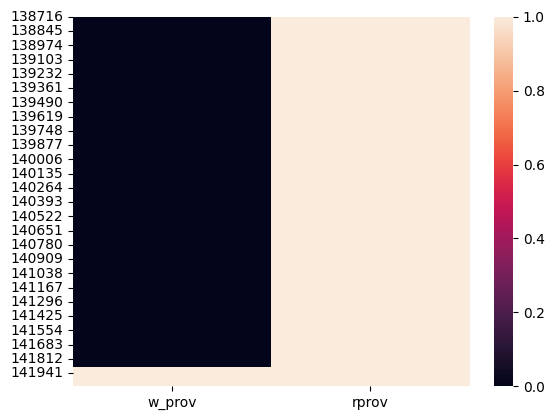

In [23]:
nadf = df[df.isna().any(axis=1)].copy()
sns.heatmap(nadf[['w_prov', 'rprov']].isna())

In [24]:
nadf.w_regn.unique()

array(['Bangsamoro Autonomous Region in Muslim Mindanao'], dtype=object)

In [25]:
nadf.groupby(['w_regn', 'w_prov']).first().index.tolist()

[('Bangsamoro Autonomous Region in Muslim Mindanao', 'Maguindanao')]

In [26]:
print(f'Ratio of Bangsamoro households with null values: {(nadf.shape[0]/df[df.w_regn == "Bangsamoro Autonomous Region in Muslim Mindanao"].shape[0])*100}%')

Ratio of Bangsamoro households with null values: 31.95413282369804%


TODO:
- impute `w_prov` to `'Maguindanao'` since it is the only value for all other rows where `w_regn` is `Bangsamoro Autonomous Region in Muslim Mindanao`
- figure out what to do with nulls in `rprov`; what we can't do is simply remove them since they represent roughly 30% of the bangsamoro households; or maybe we can remove them once we determine if `rprov` does not have any relevance to the dataset
    - impute with the values of `w_prov` since some entries also do the same thing

In [27]:
nadf.w_prov = nadf.w_prov.ffill()

In [28]:
nadf.rprov = nadf.w_prov

In [29]:
df.loc[nadf.index] = nadf

## 5. Quantitative Statistics

- Compute summary statistics (mean, median, mode) for key attributes.
- Create visualizations:
1. Histograms → Distribution of wages, income, rent.
2. Boxplots → Identify outliers.
3. Correlation matrix → Find relationships between income & spending.
4. Bar charts → Compare spending by region

## 6. Application of Proximity

### Converting all attributes to categorical values for jaccard similarity

Remove unnecessary columns for association rule mining

In [30]:
df = df.drop(columns=['seq_no', 'w_regn_nir', 'rpsu', 'npcinc', 'rpcinc', 'prpcinc', 'ppcinc', 'rpcinc_nir'])

In [31]:
# Reorder columns
cols = df.columns.tolist()
cols.insert(1, cols.pop(cols.index('urb')))
# cols.insert(0, cols.pop(cols.index('seq_no')))
cols.insert(1, cols.pop(cols.index('fsize')))
df = df.loc[:, cols]

In [32]:
l1 = ['True']
l2 = ['Low', 'High']
l3 = ['Low', 'Medium', 'High']
l4 = ['Very Low', 'Low', 'High', 'Very High']
l5 = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
l6 = ['Very Low', 'Low', 'Somewhat Low', 'Somewhat High', 'High', 'Very High']
l7 = ['Very Low', 'Low', 'Somewhat Low', 'Neutral', 'Somewhat High', 'High', 'Very High']
l8 = ['rank 1', 'rank 2', 'rank 3', 'rank 4', 'rank 5', 'rank 6', 'rank 7', 'rank 8']
l9 = ['rank 1', 'rank 2', 'rank 3', 'rank 4', 'rank 5', 'rank 6', 'rank 7', 'rank 8', 'rank 9']
l10 = ['rank 1', 'rank 2', 'rank 3', 'rank 4', 'rank 5', 'rank 6', 'rank 7', 'rank 8', 'rank 9', 'rank 10']
mp = {
    2: l1,
    3: l2,
    4: l3,
    5: l4,
    6: l5,
    7: l6,
    8: l7,
    9: l8,
    10: l9,
    11: l10
}

In [33]:
newdf = df.copy()
for col in newdf.columns[5:]:
    interval = np.unique([newdf[col].quantile(x) for x in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]]).tolist()
    temp = pd.cut(newdf[col], bins=interval, labels=mp[len(interval)], include_lowest=True)
    newdf[col] = temp

In [34]:
for col in newdf.columns[2:]:
    newdf[col] = newdf[col].astype(str)

In [35]:
newdf.shape

(163268, 82)

In [36]:
newdf.columns

Index(['w_regn', 'fsize', 'urb', 'w_prov', 'rprov', 'reg_sal', 'season_sal',
       'wages', 'netshare', 'cash_abroad', 'cash_domestic', 'rentals_rec',
       'interest', 'pension', 'dividends', 'other_source', 'net_receipt',
       'regft', 'net_cfg', 'net_lpr', 'net_fish', 'net_for', 'net_ret',
       'net_mfg', 'net_trans', 'net_nec_a8', 'net_nec_a9', 'net_nec_a10',
       'eainc', 'losses', 'bread', 'meat', 'fish', 'milk', 'oil', 'fruit',
       'veg', 'sugar', 'food_nec', 'fruit_veg', 'coffee', 'tea', 'cocoa',
       'water', 'softdrinks', 'other_non_alcohol', 'alcohol', 'tobacco',
       'other_veg', 'services_primary_goods', 'alcohol_procduction_services',
       'food_home', 'food_outside', 'food', 'cloth', 'housing_water',
       'actrent', 'imputed_rent', 'bimputed_rent', 'rentval', 'furnishing',
       'health', 'transport', 'communication', 'recreation', 'education',
       'insurance', 'miscellaneous', 'durable', 'occasion',
       'other_expenditure', 'other_disbursement'

In [37]:
sustenance = newdf[['wages', 'rprov', 'alcohol', 'tobacco', 'water', 'food', 'food_outside', 'toinc', 'education', 'net_receipt', 'eainc', 'fsize']]
food = newdf[['wages', 'eainc', 'reg_sal', 'season_sal', 'toinc', 'bread', 'meat', 'fish', 'milk', 'oil', 'fruit', 'veg', 'sugar', 'fruit_veg', 'coffee', 'tea', 'cocoa', 'water', 'softdrinks', 'net_receipt', 'fsize']]
salary = newdf[['urb', 'wages', 'reg_sal', 'season_sal', 'toinc', 'totex', 'actrent', 'dividends', 'net_receipt', 'eainc', 'fsize']]

In [38]:
def ohe(df):
    newdf = df.copy()
    for col in newdf.columns:#['w_regn', 'w_prov', 'rprov', 'fsize', 'urb', 'health']:
        newdf = newdf.join(pd.get_dummies(newdf[col], prefix=col)).drop(columns=col)
        print(f'After {col}: {newdf.shape}')
    return newdf

In [39]:
newdf.shape

(163268, 82)

## 7. Data Mining: Association Rule Mining

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

def arule(df, min_support=0.2, min_threshold=0.5):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
    return rules

In [41]:
arule(ohe(sustenance), min_support=0.2)

After wages: (163268, 19)
After rprov: (163268, 135)
After alcohol: (163268, 140)
After tobacco: (163268, 144)
After water: (163268, 152)
After food: (163268, 161)
After food_outside: (163268, 168)
After toinc: (163268, 177)
After education: (163268, 183)
After net_receipt: (163268, 188)
After eainc: (163268, 193)
After fsize: (163268, 231)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(wages_rank 1),(alcohol_Very Low),0.302644,0.500104,0.201136,0.664596,1.328915,1.0,0.049782,1.490428,0.354921,0.334328,0.329052,0.533392
1,(alcohol_Very Low),(wages_rank 1),0.500104,0.302644,0.201136,0.402187,1.328915,1.0,0.049782,1.166513,0.495115,0.334328,0.142745,0.533392
2,(tobacco_Very Low),(alcohol_Very Low),0.600099,0.500104,0.365062,0.608337,1.216420,1.0,0.064950,1.276341,0.444899,0.496588,0.216510,0.669155
3,(alcohol_Very Low),(tobacco_Very Low),0.500104,0.600099,0.365062,0.729973,1.216420,1.0,0.064950,1.480964,0.355905,0.496588,0.324764,0.669155
4,(education_Very Low),(alcohol_Very Low),0.405738,0.500104,0.218604,0.538781,1.077337,1.0,0.015693,1.083858,0.120798,0.318090,0.077370,0.487949
5,(alcohol_Very Low),(education_Very Low),0.500104,0.405738,0.218604,0.437117,1.077337,1.0,0.015693,1.055746,0.143601,0.318090,0.052803,0.487949
6,(net_receipt_Very Low),(alcohol_Very Low),0.500024,0.500104,0.259359,0.518692,1.037169,1.0,0.009295,1.038620,0.071677,0.350121,0.037184,0.518651
7,(alcohol_Very Low),(net_receipt_Very Low),0.500104,0.500024,0.259359,0.518610,1.037169,1.0,0.009295,1.038607,0.071688,0.350121,0.037172,0.518651
8,(eainc_Very Low),(alcohol_Very Low),0.501403,0.500104,0.248879,0.496366,0.992525,1.0,-0.001874,0.992577,-0.014880,0.330680,-0.007478,0.497010
9,(alcohol_Very Low),(eainc_Very Low),0.500104,0.501403,0.248879,0.497655,0.992525,1.0,-0.001874,0.992539,-0.014842,0.330680,-0.007517,0.497010


In [42]:
arule(ohe(food), min_support=0.4)

After wages: (163268, 28)
After eainc: (163268, 33)
After reg_sal: (163268, 39)
After season_sal: (163268, 42)
After toinc: (163268, 51)
After bread: (163268, 60)
After meat: (163268, 69)
After fish: (163268, 78)
After milk: (163268, 87)
After oil: (163268, 96)
After fruit: (163268, 105)
After veg: (163268, 114)
After sugar: (163268, 123)
After fruit_veg: (163268, 131)
After coffee: (163268, 140)
After tea: (163268, 142)
After cocoa: (163268, 146)
After water: (163268, 154)
After softdrinks: (163268, 163)
After net_receipt: (163268, 168)
After fsize: (163268, 206)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(tea_Low),(eainc_Very Low),0.800518,0.501403,0.402418,0.502697,1.002582,1.0,0.001036,1.002603,0.012908,0.447378,0.002596,0.652641
1,(eainc_Very Low),(tea_Low),0.501403,0.800518,0.402418,0.802585,1.002582,1.0,0.001036,1.010468,0.005164,0.447378,0.010360,0.652641
2,(tea_Low),(season_sal_Very Low),0.800518,0.700211,0.547633,0.684099,0.976990,1.0,-0.012898,0.948996,-0.105600,0.574584,-0.053745,0.733098
3,(season_sal_Very Low),(tea_Low),0.700211,0.800518,0.547633,0.782098,0.976990,1.0,-0.012898,0.915466,-0.072840,0.574584,-0.092340,0.733098
4,(cocoa_Very Low),(season_sal_Very Low),0.603946,0.700211,0.421522,0.697946,0.996766,1.0,-0.001368,0.992504,-0.008125,0.477572,-0.007553,0.649969
5,(season_sal_Very Low),(cocoa_Very Low),0.700211,0.603946,0.421522,0.601993,0.996766,1.0,-0.001368,0.995093,-0.010706,0.477572,-0.004931,0.649969
6,(cocoa_Very Low),(tea_Low),0.603946,0.800518,0.524904,0.869124,1.085702,1.0,0.041434,1.524208,0.199309,0.596780,0.343922,0.762415
7,(tea_Low),(cocoa_Very Low),0.800518,0.603946,0.524904,0.655705,1.085702,1.0,0.041434,1.150335,0.395711,0.596780,0.130688,0.762415


In [43]:
arule(ohe(salary), min_support=0.6)

After urb: (163268, 12)
After wages: (163268, 19)
After reg_sal: (163268, 25)
After season_sal: (163268, 28)
After toinc: (163268, 37)
After totex: (163268, 46)
After actrent: (163268, 47)
After dividends: (163268, 47)
After net_receipt: (163268, 52)
After eainc: (163268, 57)
After fsize: (163268, 95)


c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(actrent_Low),(season_sal_Very Low),0.900225,0.700211,0.622020,0.690961,0.986789,1.0,-0.008327,0.970068,-0.118303,0.635742,-0.030855,0.789647
1,(season_sal_Very Low),(actrent_Low),0.700211,0.900225,0.622020,0.888333,0.986789,1.0,-0.008327,0.893501,-0.042747,0.635742,-0.119193,0.789647
2,(dividends_True),(season_sal_Very Low),1.000000,0.700211,0.700211,0.700211,1.000000,1.0,0.000000,1.000000,0.000000,0.700211,0.000000,0.850105
3,(season_sal_Very Low),(dividends_True),0.700211,1.000000,0.700211,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.700211,0.000000,0.850105
4,(dividends_True),(actrent_Low),1.000000,0.900225,0.900225,0.900225,1.000000,1.0,0.000000,1.000000,0.000000,0.900225,0.000000,0.950113
5,(actrent_Low),(dividends_True),0.900225,1.000000,0.900225,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.900225,0.000000,0.950113
6,"(dividends_True, actrent_Low)",(season_sal_Very Low),0.900225,0.700211,0.622020,0.690961,0.986789,1.0,-0.008327,0.970068,-0.118303,0.635742,-0.030855,0.789647
7,"(dividends_True, season_sal_Very Low)",(actrent_Low),0.700211,0.900225,0.622020,0.888333,0.986789,1.0,-0.008327,0.893501,-0.042747,0.635742,-0.119193,0.789647
8,"(actrent_Low, season_sal_Very Low)",(dividends_True),0.622020,1.000000,0.622020,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.622020,0.000000,0.811010
9,(dividends_True),"(actrent_Low, season_sal_Very Low)",1.000000,0.622020,0.622020,0.622020,1.000000,1.0,0.000000,1.000000,0.000000,0.622020,0.000000,0.811010
